In [6]:
import os
import numpy as np
from PIL import Image
from cityscapesscripts.helpers.labels import labels

In [7]:
COLOR_TO_TRAINID = {label.color: label.trainId for label in labels if label.trainId != 255 and label.trainId != -1}

In [8]:
print(COLOR_TO_TRAINID)

{(128, 64, 128): 0, (244, 35, 232): 1, (70, 70, 70): 2, (102, 102, 156): 3, (190, 153, 153): 4, (153, 153, 153): 5, (250, 170, 30): 6, (220, 220, 0): 7, (107, 142, 35): 8, (152, 251, 152): 9, (70, 130, 180): 10, (220, 20, 60): 11, (255, 0, 0): 12, (0, 0, 142): 13, (0, 0, 70): 14, (0, 60, 100): 15, (0, 80, 100): 16, (0, 0, 230): 17, (119, 11, 32): 18}


In [9]:
# Mappa colore RGB → trainId
DEFAULT_TRAINID = 255  # per classi non definite

def rgb_mask_to_trainId(img: Image.Image) -> Image.Image:
    arr = np.array(img)
    h, w, _ = arr.shape
    train_id_mask = np.ones((h, w), dtype=np.uint8) * DEFAULT_TRAINID

    for color, train_id in COLOR_TO_TRAINID.items():
        matches = np.all(arr == color, axis=-1)
        print(f"Found {np.sum(matches)} pixels for color {color} with train_id {train_id}")
        train_id_mask[matches] = train_id

    return Image.fromarray(train_id_mask)


In [ ]:
in_dir = "input_dir_path"  
out_dir = " output_dir_path"
os.makedirs(out_dir, exist_ok=True)

for filename in os.listdir(in_dir):
    if filename.endswith(".png"):
        path = os.path.join(in_dir, filename)
        img = Image.open(path).convert("RGB")
        mask = rgb_mask_to_trainId(img)
        mask.save(os.path.join(out_dir, filename.replace(".png", "_trainId.png")))

Found 182664 pixels for color (128, 64, 128) with train_id 0
Found 31366 pixels for color (244, 35, 232) with train_id 1
Found 67488 pixels for color (70, 70, 70) with train_id 2
Found 14232 pixels for color (102, 102, 156) with train_id 3
Found 8239 pixels for color (190, 153, 153) with train_id 4
Found 6609 pixels for color (153, 153, 153) with train_id 5
Found 389 pixels for color (250, 170, 30) with train_id 6
Found 922 pixels for color (220, 220, 0) with train_id 7
Found 18777 pixels for color (107, 142, 35) with train_id 8
Found 247 pixels for color (152, 251, 152) with train_id 9
Found 97695 pixels for color (70, 130, 180) with train_id 10
Found 140 pixels for color (220, 20, 60) with train_id 11
Found 0 pixels for color (255, 0, 0) with train_id 12
Found 353 pixels for color (0, 0, 142) with train_id 13
Found 2679 pixels for color (0, 0, 70) with train_id 14
Found 0 pixels for color (0, 60, 100) with train_id 15
Found 0 pixels for color (0, 80, 100) with train_id 16
Found 0 pix

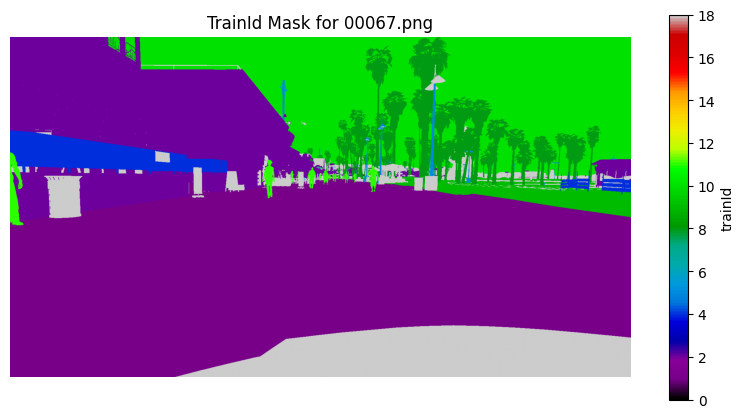

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(mask, cmap='nipy_spectral', vmin=0, vmax=18)
plt.title(f"TrainId Mask for {filename}")
plt.axis('off')
plt.colorbar(label='trainId')
plt.show()